<a href="https://colab.research.google.com/github/suryanshshah2006/Brain-Tumor-detection/blob/main/Preprocessing_for_brain_tumor_detection_from_MRI_Images_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
import json
import os

# Your specific credentials from your screenshot
kaggle_username = 'suryanshshah'
kaggle_token = 'KGAT_c6e62e674ce15cae2dd30a93bf313757'

# Create the .kaggle directory and the file
! mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as f:
    json.dump({"username": kaggle_username, "key": kaggle_token}, f)

# Move the file to the correct location and set secure permissions
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

print("Kaggle authentication successful!")

Kaggle authentication successful!


In [ ]:
# API command for the Dog_vs_cat_data dataset
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 89% 132M/149M [00:00<00:00, 1.38GB/s]
100% 149M/149M [00:00<00:00, 1.29GB/s]


In [ ]:
# Unzip the downloaded file (The file name is based on the dataset name)
! unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import cv2

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/Training',
    validation_split=0.12,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/Training',
    validation_split=0.12,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/Testing',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 5712 files belonging to 4 classes.
Using 5027 files for training.
Found 5712 files belonging to 4 classes.
Using 685 files for validation.
Found 1311 files belonging to 4 classes.


In [ ]:
for images, labels in train_ds.take(1):
    sample_image = images[0].numpy().astype('uint8')

In [ ]:
if len(sample_image.shape) == 3 and sample_image.shape[-1] == 3:
    gray_img = cv2.cvtColor(sample_image, cv2.COLOR_RGB2GRAY)
else:
    gray_img = np.squeeze(sample_image)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

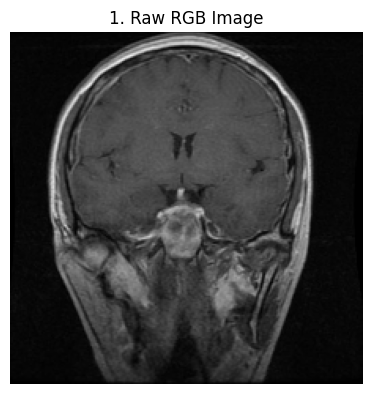

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("1. Raw RGB Image")
plt.axis('off')

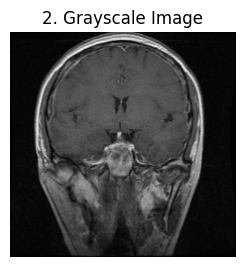

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("2. Grayscale Image")
plt.axis('off')
plt.show()

In [ ]:
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

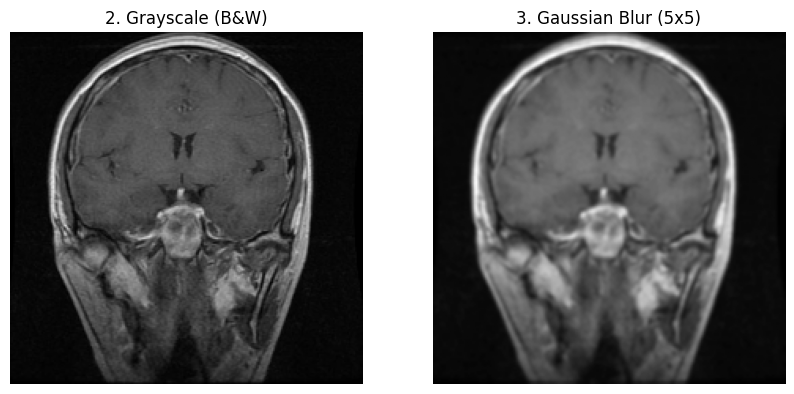

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("2. Grayscale (B&W)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title("3. Gaussian Blur (5x5)")
plt.axis('off')
plt.show()

In [ ]:
_, thresh_img = cv2.threshold(blurred_img, 45, 255, cv2.THRESH_BINARY)

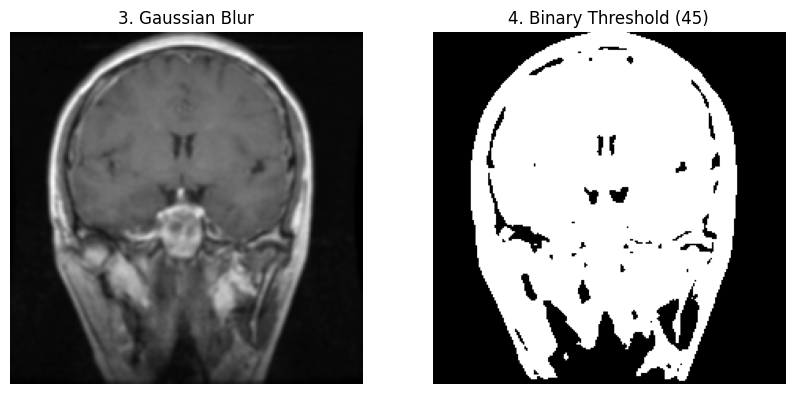

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_img, cmap='gray')
plt.title("3. Gaussian Blur")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title("4. Binary Threshold (45)")
plt.axis('off')
plt.show()

**The "Brush" (kernel) **

kernel = np.ones((3, 3), np.uint8)


Easy Explanation: This creates a tiny $3 \times 3$ square of pixels.The Analogy: Think of this as the size of the brush head or eraser tip we are going to use. A $3 \times 3$ kernel is small and precise, perfect for medical images.

**The "Eraser" (cv2.erode)**

eroded_mask = cv2.erode(thresh_img, kernel, iterations=2)
Easy Explanation: Erosion "eats away" the edges of white shapes.

Why we use it: Sometimes the thresholding leaves behind tiny white "crumbs" or "noise" floating in the black background.

The Result: By running this 2 times (iterations=2), the tiny crumbs are small enough to be completely erased, while the big brain shape just gets slightly thinner.

**The "Sharpie" (cv2.dilate)**


cleaned_mask = cv2.dilate(eroded_mask, kernel, iterations=1)
Easy Explanation: Dilation does the opposite—it "grows" the edges of white shapes.

Why we use it: Since the "Eraser" step made our brain a little bit too thin, we use the Sharpie to puff it back up.

The Result: By running this 1 time, we restore the brain's thickness and fill in any tiny black holes inside the white area.

In [ ]:
kernel = np.ones((3, 3), np.uint8)

eroded_mask = cv2.erode(thresh_img, kernel, iterations=2)

cleaned_mask = cv2.dilate(eroded_mask, kernel, iterations=1)

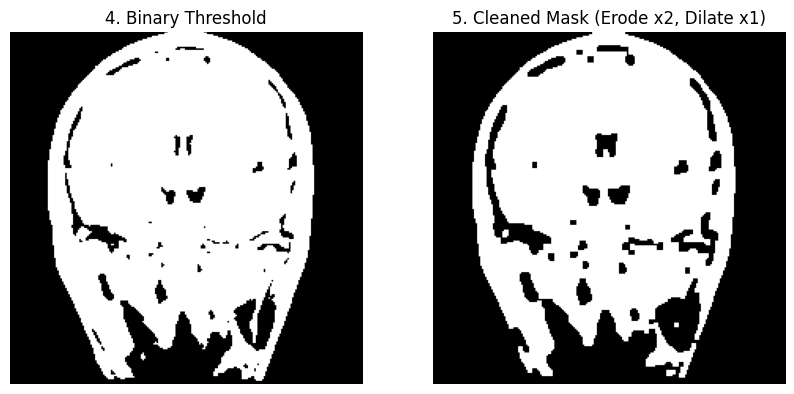

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh_img, cmap='gray')
plt.title("4. Binary Threshold")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cleaned_mask, cmap='gray')
plt.title("5. Cleaned Mask (Erode x2, Dilate x1)")
plt.axis('off')
plt.show()

**findContours:** This tells the computer to trace the outline of every white object it sees in your binary mask.


*   1. cleaned_mask.copy() (The Paper to Trace)
  Imagine I give you a drawing and ask you to trace it with a marker. If you trace directly on my drawing, you might ruin it.
  
        In the code: We use .copy() to give the computer a "photocopy" to draw on.

        The result: Your original cleaned mask stays perfect and untouched.

*   2. cv2.RETR_EXTERNAL (The Outer Edge Only)
  Imagine you are looking at a picture of a donut. A donut has an outer edge and an inner edge (the hole).

        In the code: RETR_EXTERNAL tells the computer: "I only care about the very outside edge. Ignore any holes or details inside".

        The result: It finds the outer "shell" of the head and ignores everything inside the brain.


*   3. cv2.CHAIN_APPROX_SIMPLE (The Memory Saver)
  Imagine I ask you to describe a square.

        Option A: You give me the coordinates of every single millimeter along the lines (thousands of points).

        Option B: You just give me the 4 corners.

        In the code: CHAIN_APPROX_SIMPLE is Option B. It removes all the redundant points and only keeps the essential "corner" points.

        The result: The computer runs much faster and uses less RAM.






**max(cnts, ...)**: Sometimes there are tiny white specks left over. This line tells the computer, "Find the biggest white shape (the brain) and ignore everything else". We call this biggest shape c.

extLeft = ... # The point furthest to the left

extRight = ... # The point furthest to the right

extTop = ... # The highest point

extBottom = ... # The lowest point

In [ ]:
cnts, _ = cv2.findContours(cleaned_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = max(cnts, key=cv2.contourArea)

extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBottom = tuple(c[c[:, :, 1].argmax()][0])

cropped_img = gray_img[extTop[1]:extBottom[1], extLeft[0]:extRight[0]]

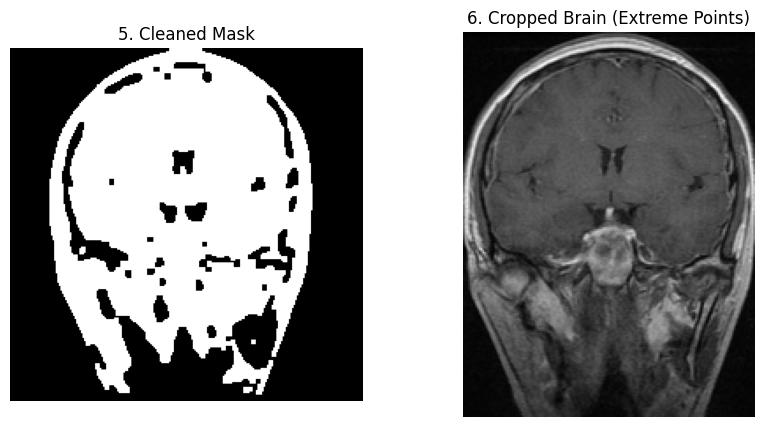

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cleaned_mask, cmap='gray')
plt.title("5. Cleaned Mask")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_img, cmap='gray')
plt.title("6. Cropped Brain (Extreme Points)")
plt.axis('off')
plt.show()

**The Settings (radius and n_points)**

radius = 1

n_points = 8 * radius


The Neighbors: n_points = 8 tells the computer to look at the 8 pixels immediately surrounding a center pixel (Up, Down, Left, Right, and the 4 diagonals).

The Distance: radius = 1 means it only looks at the neighbors that are 1 pixel away.

The Analogy: Imagine a pixel is a house. We are asking the computer to check on the 8 closest neighbors living next door to see if they are "brighter" or "darker" than the house in the middle.

**The Logic (method='uniform')**

Easy Explanation: This is a "cleaning" filter. It tells the computer to only keep the most important and common texture patterns (like straight edges or corners) and ignore the messy, random "noise".

The Result: It makes the texture map much cleaner and easier for the AI to understand.

In [ ]:
from skimage.feature import local_binary_pattern

radius = 1
n_points = 8 * radius

lbp_image = local_binary_pattern(cropped_img, n_points, radius, method='uniform')

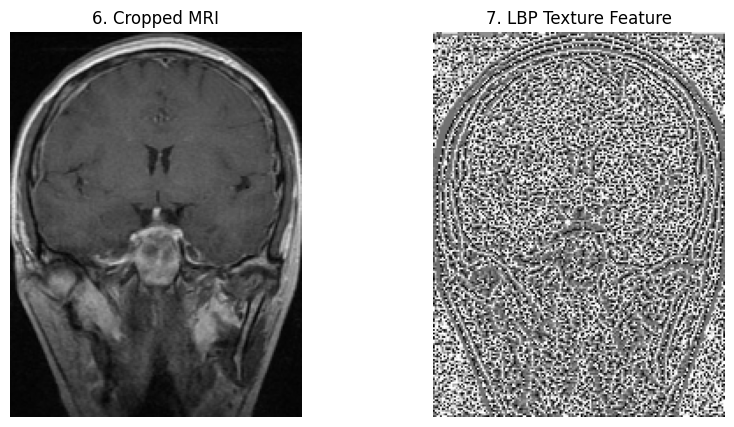

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cropped_img, cmap='gray')
plt.title("6. Cropped MRI")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title("7. LBP Texture Feature")
plt.axis('off')
plt.show()

cv2.resize(..., (224, 224)): MRI scans come in different sizes, but the ShallowMRI model needs every image to be exactly $224 \times 224$ pixels to work.

tf.convert_to_tensor: This converts the image from a standard Python array into a Tensor, which is the specific "language" TensorFlow and your GPU use to process data.

tf.expand_dims(..., -1): Your image is currently 2D (height, width). Deep learning models expect a 3D shape (height, width, channels). Since this is grayscale, we add a "1" at the end to represent a single color channel.

tf.keras.Sequential: This is a container that holds multiple transformations in a specific order.

RandomFlip: This randomly mirrors the image left-to-right or upside-down. This teaches the model that a tumor is still a tumor, regardless of which way the patient was lying in the scanner.

RandomRotation(0.25): In TensorFlow, $0.25$ means $25\%$ of a circle, which is exactly 90 degrees. This provides the model with different angles of the same brain scan.

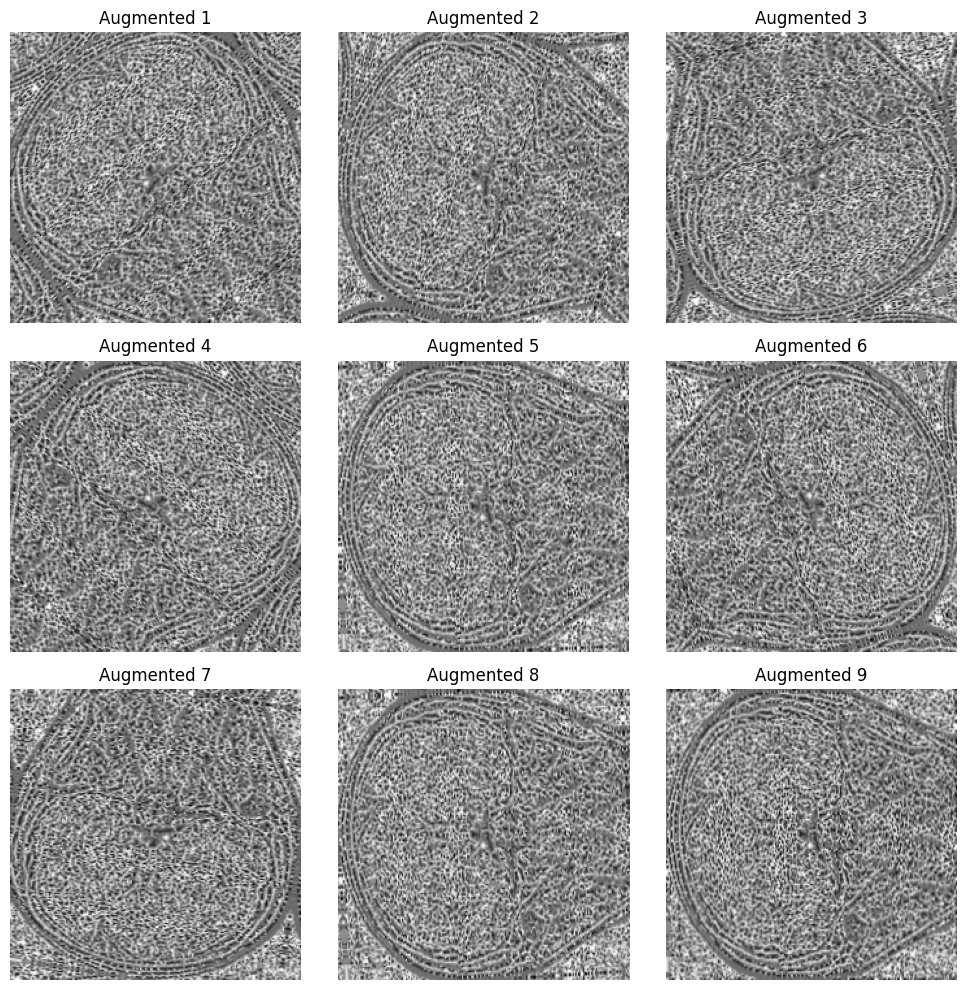

In [ ]:
final_image_resized = cv2.resize(lbp_image, (224, 224))
image_tensor = tf.convert_to_tensor(final_image_resized, dtype=tf.float32)
image_tensor = tf.expand_dims(image_tensor, -1)

aug_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.25)
])

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_img = aug_layers(tf.expand_dims(image_tensor, 0), training=True)

    plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_img), cmap='gray')
    plt.title(f"Augmented {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()